# Data Information

### Attribute information:

Input variables:
- age (numeric)
- job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
- marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- education (categorical: "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric) 
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")
- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
   
Output variable (desired target):
- y: has the client subscribed a term deposit? (binary: "yes","no")

# Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("processed-data.csv")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,not applicable,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,not applicable,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,not applicable,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,not applicable,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,not applicable,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,not applicable,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,not applicable,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,not applicable,no


# Exploratory Data Analysis

In [4]:
def histogram_boxplot(feature, figsize=(11.25,7.5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

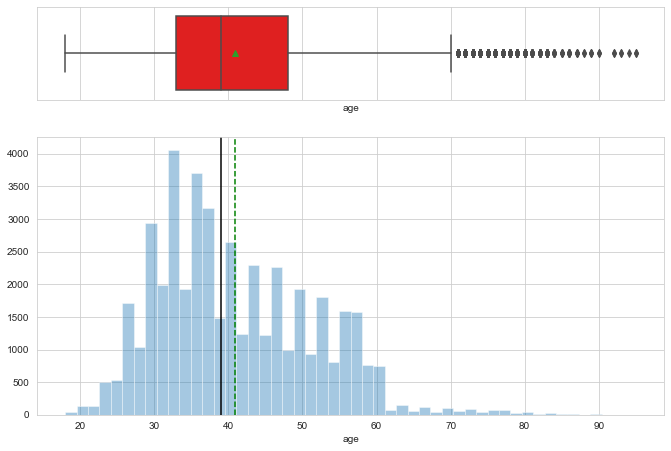

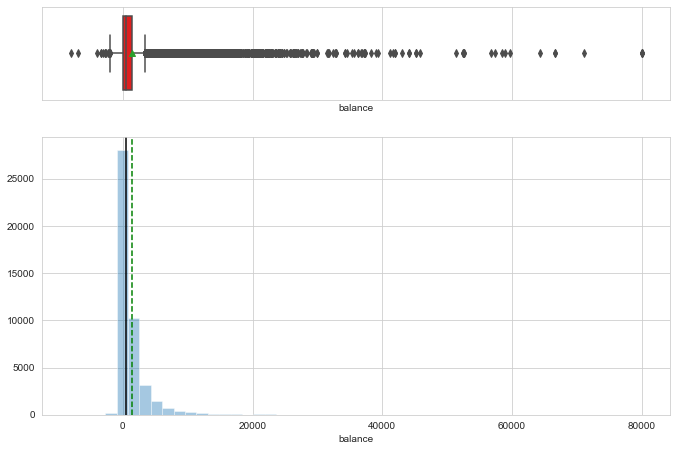

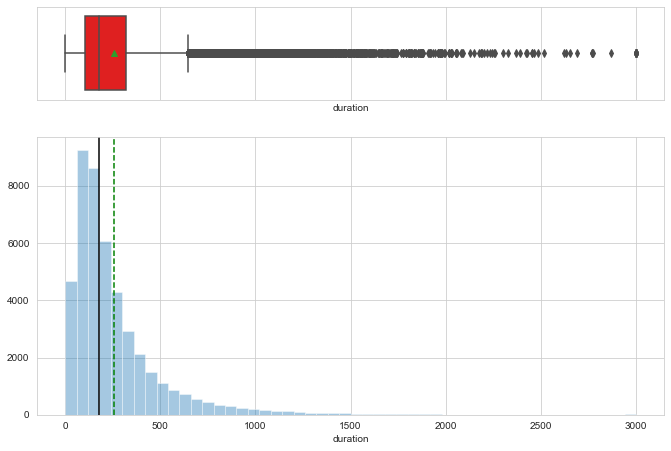

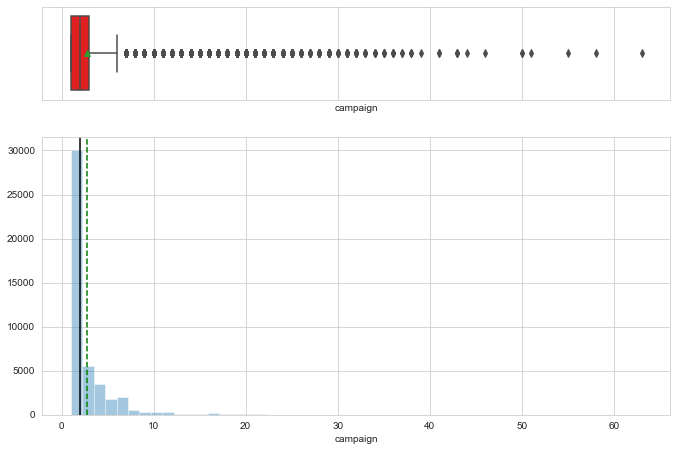

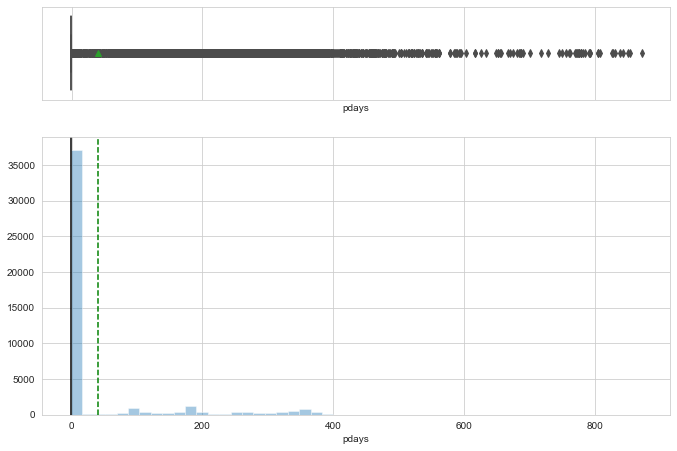

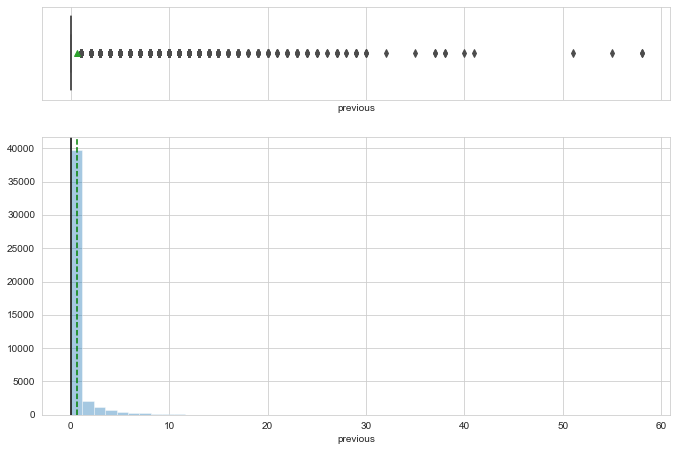

In [6]:
cols = ['age','balance','duration', 'campaign', 'pdays',
       'previous']

for col in cols:
    histogram_boxplot(df[col])

#### Observations
- The age graph is almost normally distributed, with some outliers which are acceptable.
- Majority of customers have very low bank balances, and some have negative balances. There are several outliers, with many high bank balances.
- Most features have many outliers due to majority of customers not being contacted for a previous campaign.

In [7]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(13,7)})
    ax=sns.countplot(x=feature, data=df)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
    plt.show()

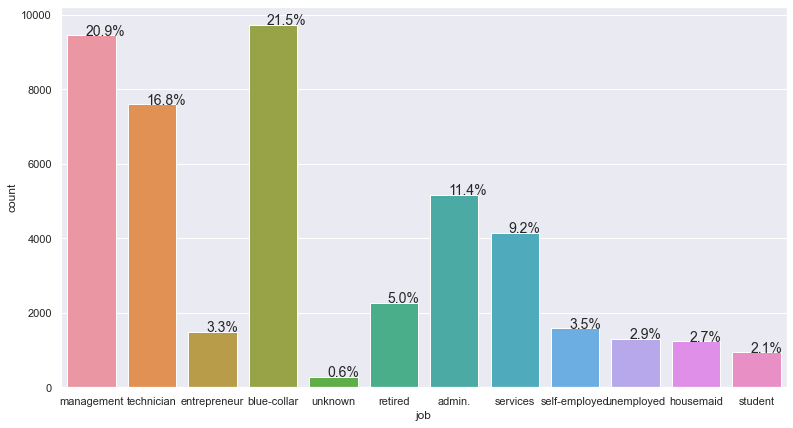

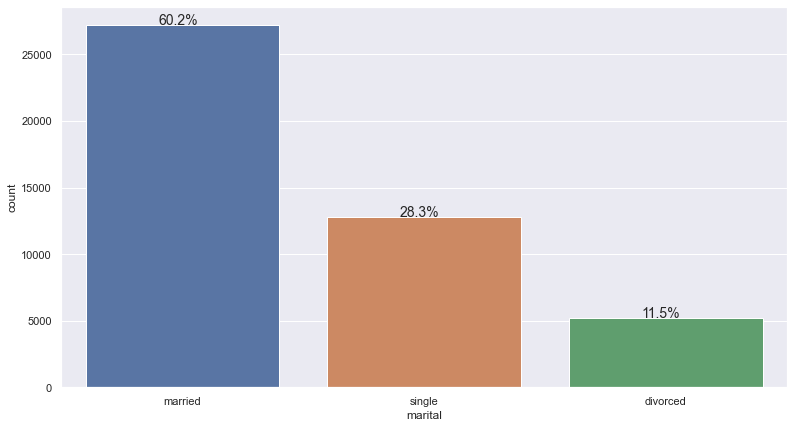

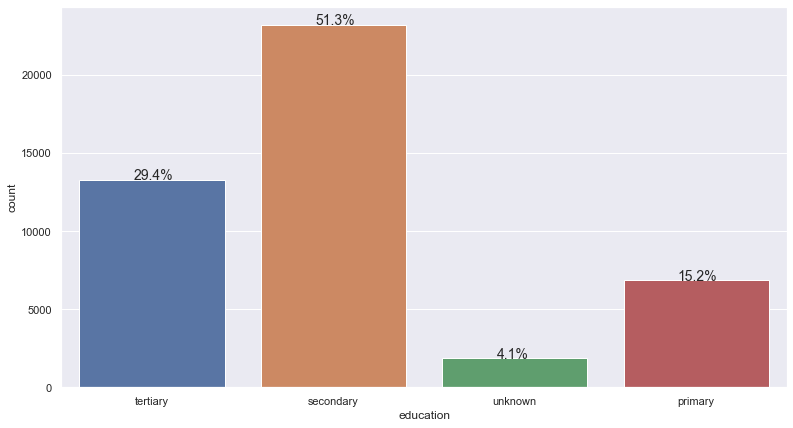

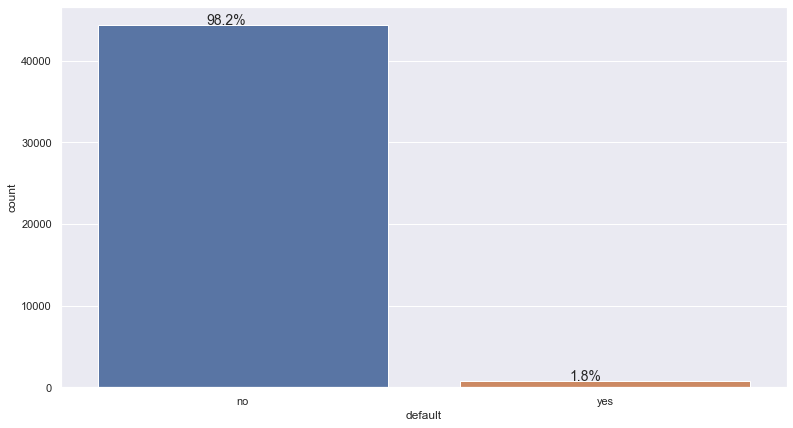

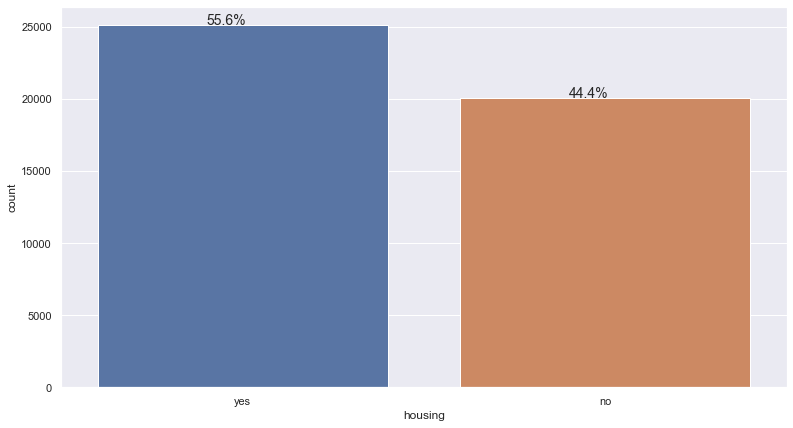

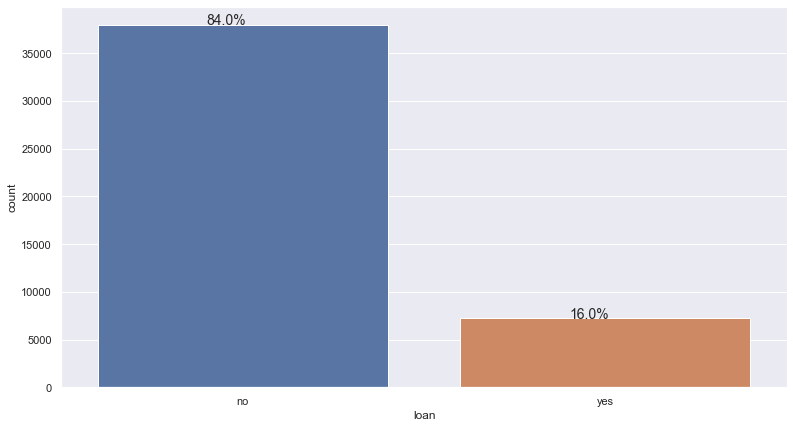

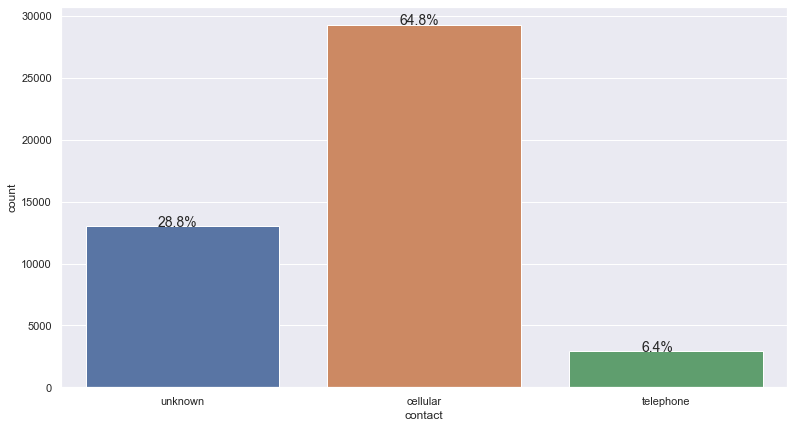

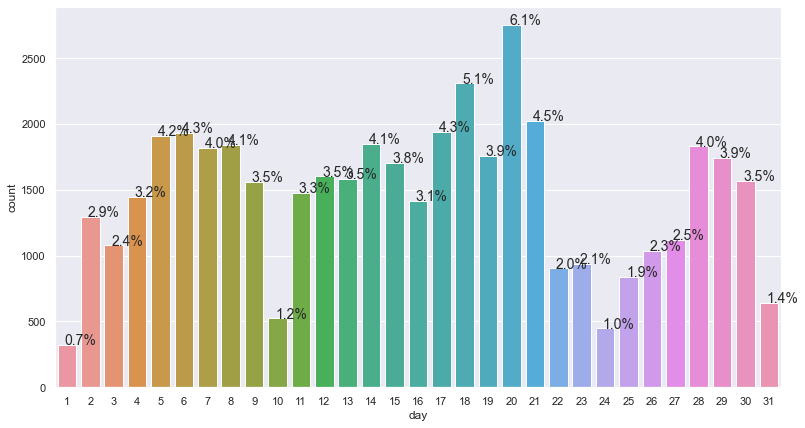

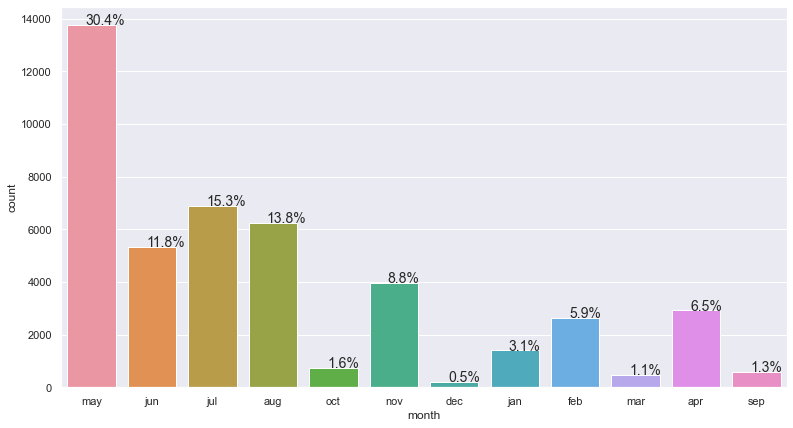

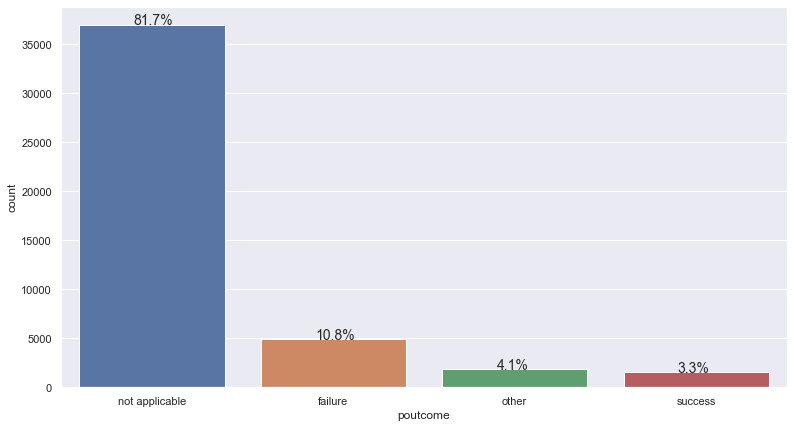

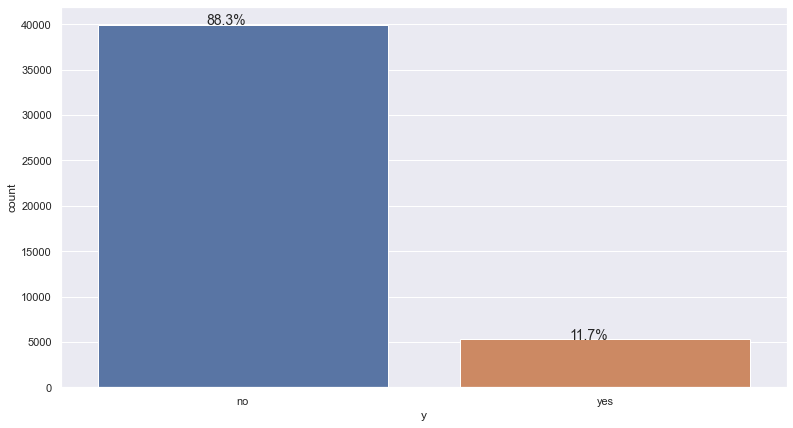

In [8]:
cols = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'poutcome', 'y']

for col in cols:
    perc_on_bar(df[col])

#### Observations
- Majority of customers are either blue collar workers, technicians, or in management.
- Most customers are married. Most customers also have atleast a secondary education.
- Only 1.8% of customers have credit default.
- Around 55% of customers have a housing loan, but only 16% have a personal loan.
- More customers were contacted through cellular phone than telephone.
- Summer had the most number of customer contacts, in the months of May to August.
- Out of the 18% that were contacted for a previous campaign, only 3.3% were successful in buying the product.
- 11.7% of customers have bought the term deposit. This is an improvement from the previous campaign, it seems.

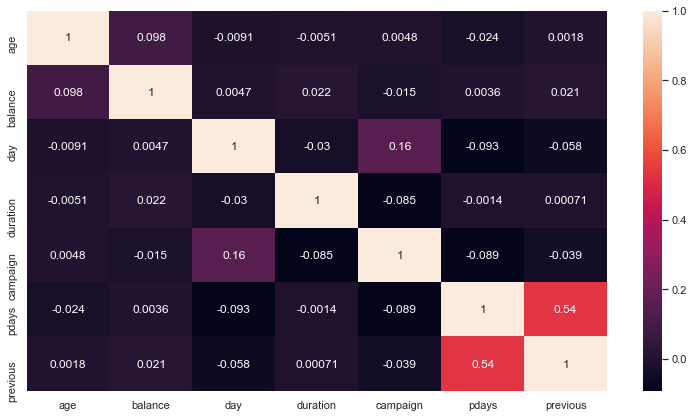

In [9]:
sns.heatmap(df.corr(), annot=True)

#### No correlation between any of the features, which is good.

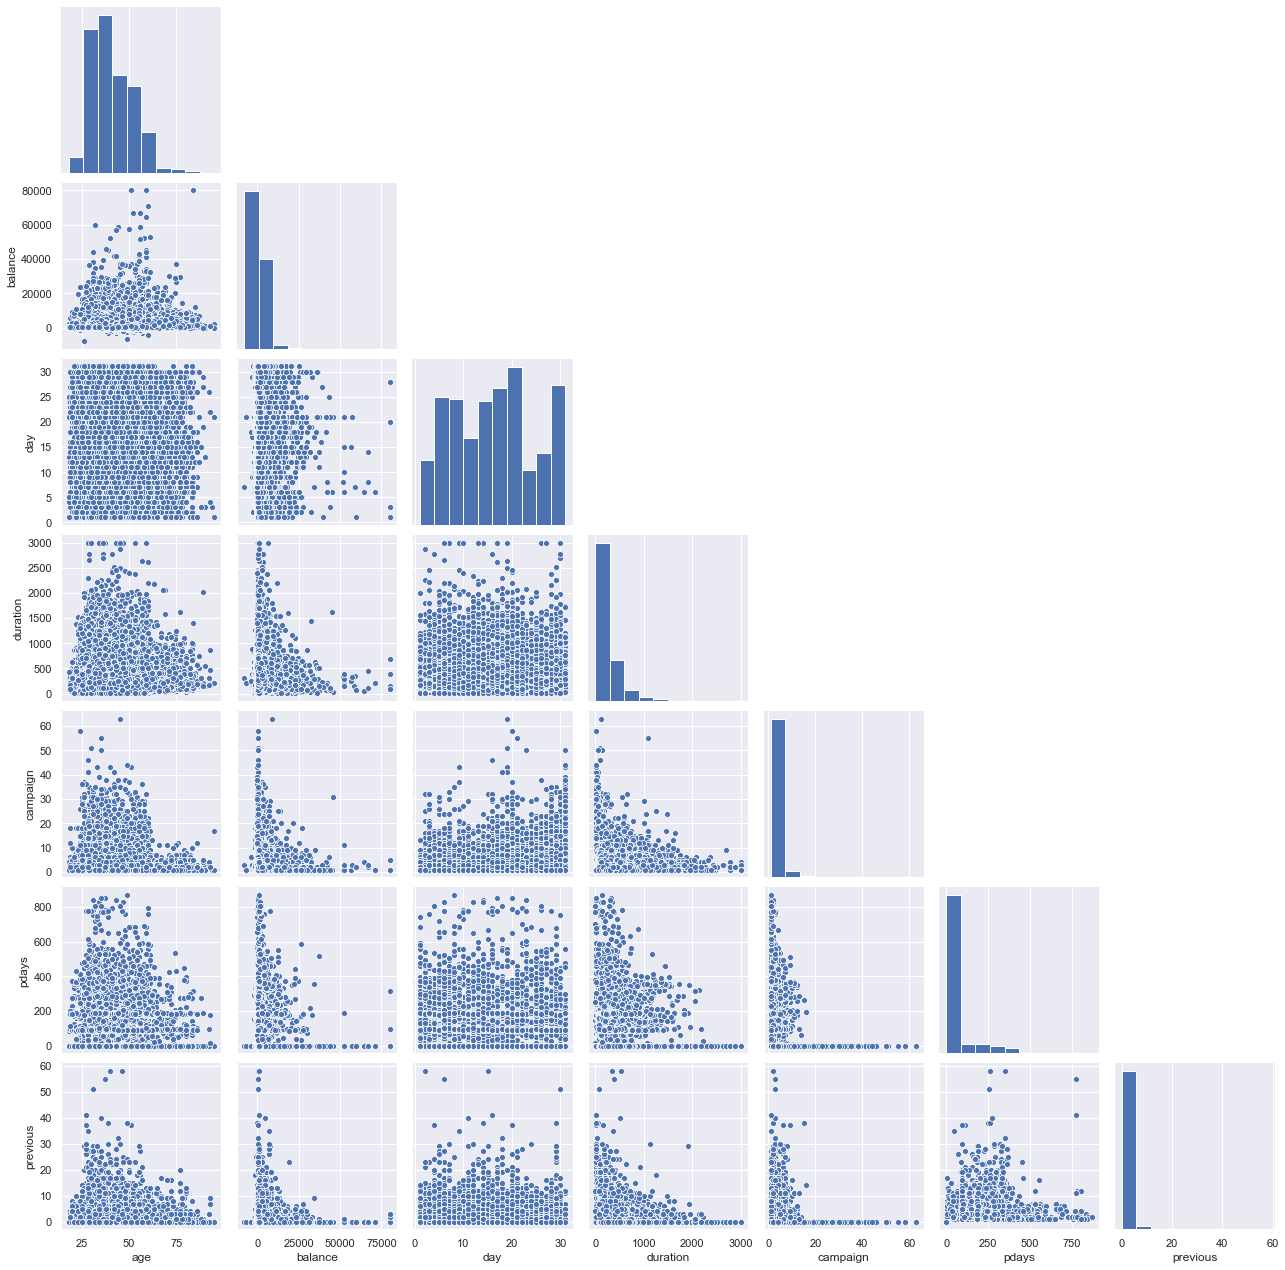

In [10]:
sns.pairplot(df, corner=True)

In [11]:
# Plot a stacked plot with the y variable as hue.
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,df['y'],margins=True).sort_values(by='yes',ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,df['y'],normalize='index').sort_values(by='yes',ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

y                 no   yes    All
job                              
All            39922  5289  45211
management      8157  1301   9458
technician      6757   840   7597
blue-collar     9024   708   9732
admin.          4540   631   5171
retired         1748   516   2264
services        3785   369   4154
student          669   269    938
unemployed      1101   202   1303
self-employed   1392   187   1579
entrepreneur    1364   123   1487
housemaid       1131   109   1240
unknown          254    34    288
------------------------------------------------------------------------------------------------------------------------


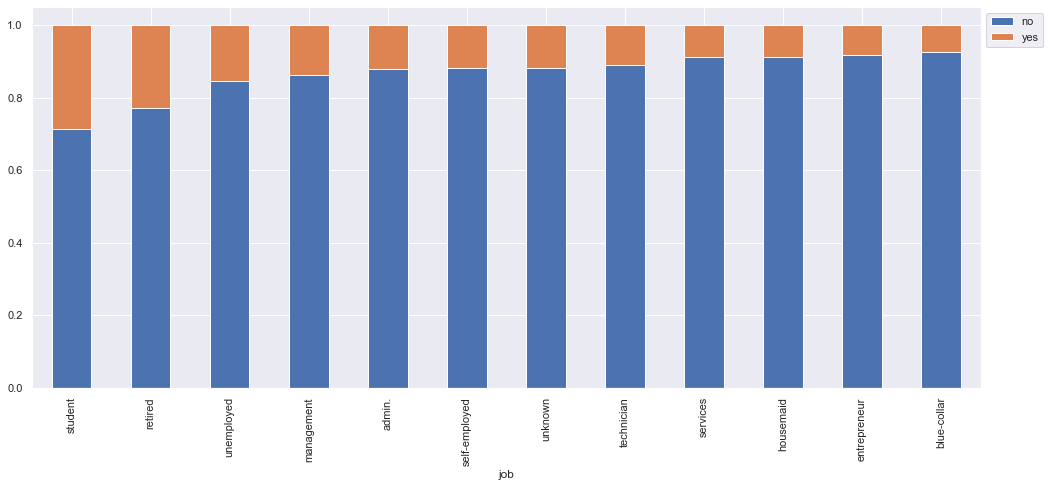

y            no   yes    All
marital                     
All       39922  5289  45211
married   24459  2755  27214
single    10878  1912  12790
divorced   4585   622   5207
------------------------------------------------------------------------------------------------------------------------


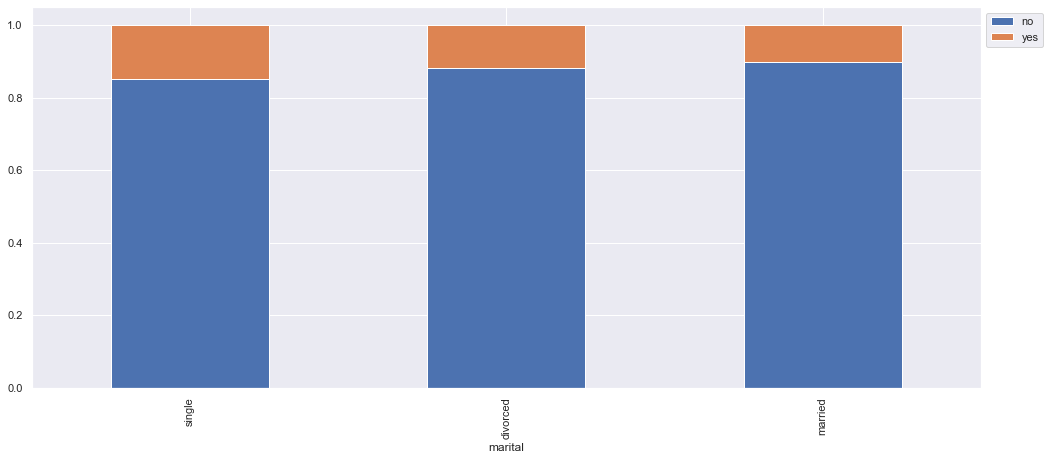

y             no   yes    All
education                    
All        39922  5289  45211
secondary  20752  2450  23202
tertiary   11305  1996  13301
primary     6260   591   6851
unknown     1605   252   1857
------------------------------------------------------------------------------------------------------------------------


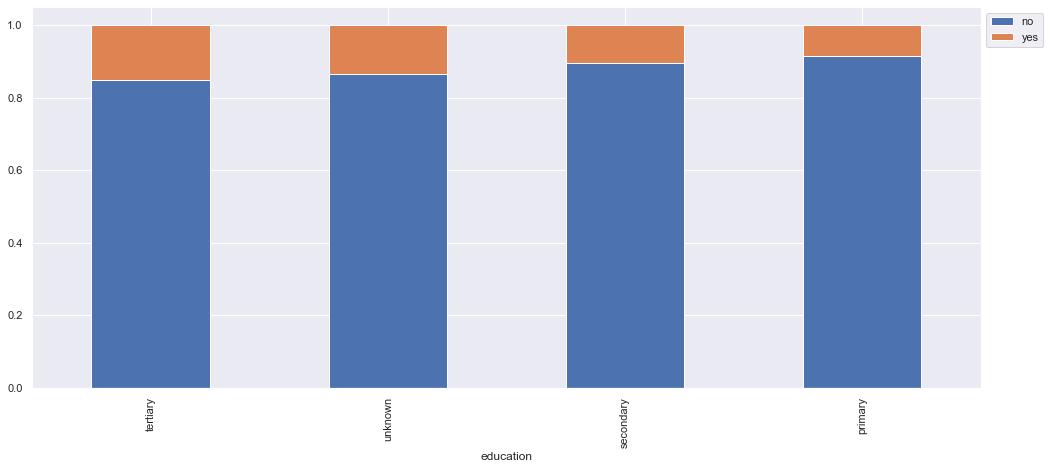

y           no   yes    All
default                    
All      39922  5289  45211
no       39159  5237  44396
yes        763    52    815
------------------------------------------------------------------------------------------------------------------------


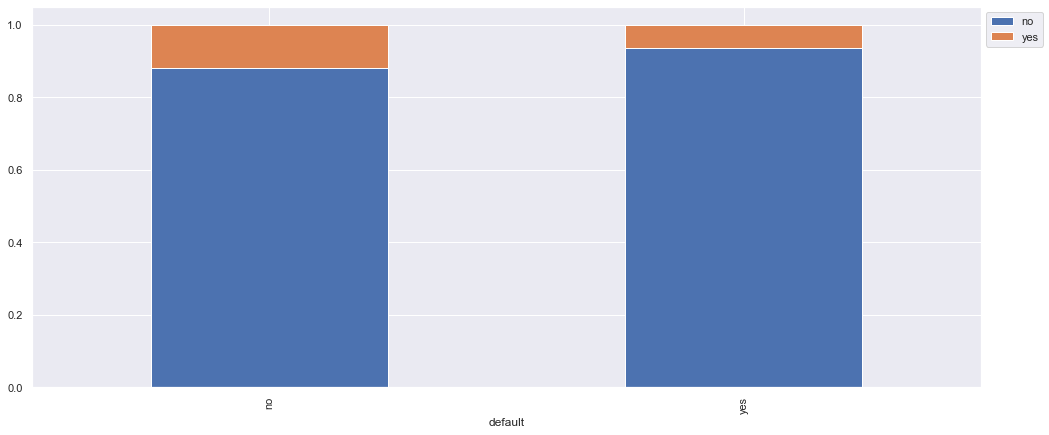

y           no   yes    All
housing                    
All      39922  5289  45211
no       16727  3354  20081
yes      23195  1935  25130
------------------------------------------------------------------------------------------------------------------------


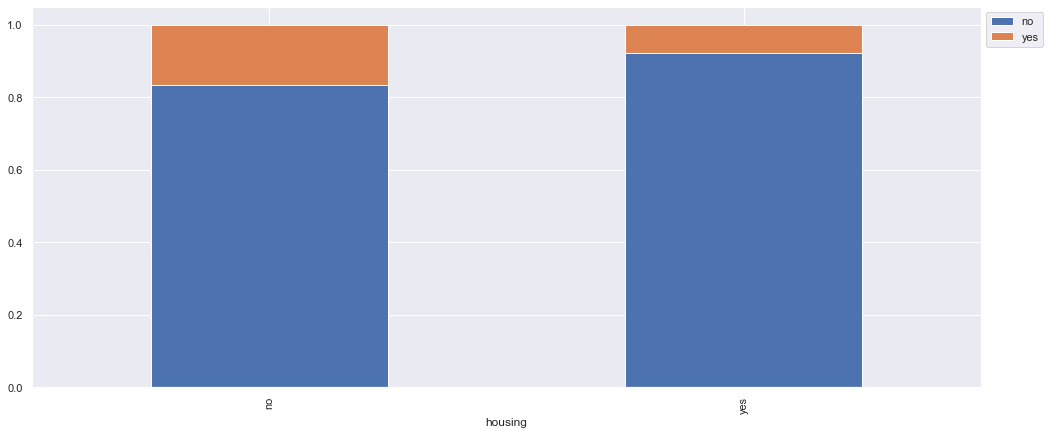

y        no   yes    All
loan                    
All   39922  5289  45211
no    33162  4805  37967
yes    6760   484   7244
------------------------------------------------------------------------------------------------------------------------


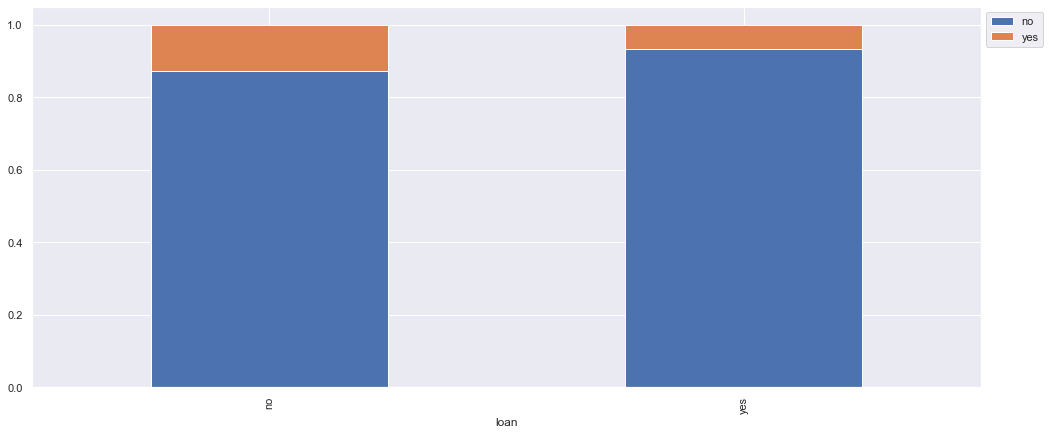

y             no   yes    All
contact                      
All        39922  5289  45211
cellular   24916  4369  29285
unknown    12490   530  13020
telephone   2516   390   2906
------------------------------------------------------------------------------------------------------------------------


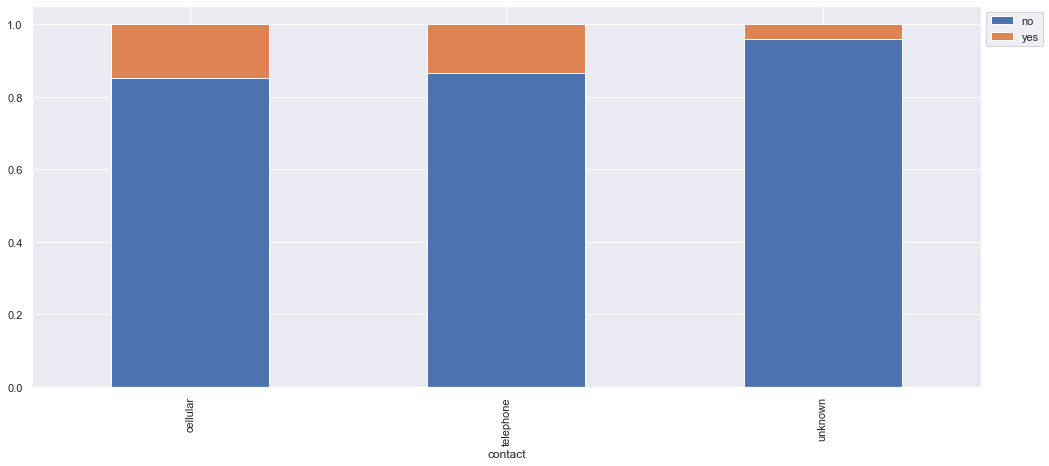

y       no   yes    All
day                    
All  39922  5289  45211
30    1295   271   1566
12    1359   244   1603
13    1344   241   1585
15    1465   238   1703
4     1215   230   1445
18    2080   228   2308
5     1695   215   1910
14    1638   210   1848
8     1641   201   1842
21    1825   201   2026
20    2560   192   2752
16    1223   192   1415
2     1111   182   1293
11    1298   181   1479
6     1751   181   1932
9     1382   179   1561
3      901   178   1079
17    1763   176   1939
7     1660   157   1817
22     751   154    905
27     971   150   1121
28    1687   143   1830
25     707   133    840
29    1616   129   1745
23     813   126    939
19    1635   122   1757
10     403   121    524
26     919   116   1035
1      232    90    322
24     385    62    447
31     597    46    643
------------------------------------------------------------------------------------------------------------------------


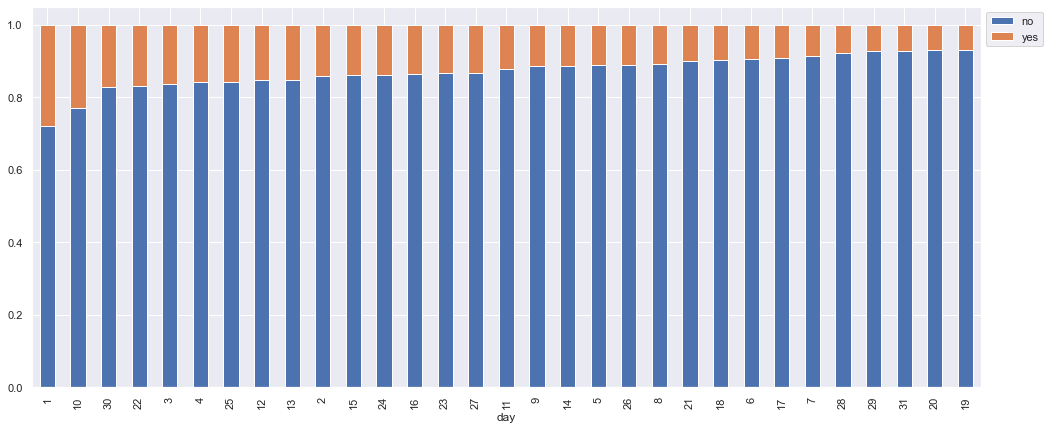

y         no   yes    All
month                    
All    39922  5289  45211
may    12841   925  13766
aug     5559   688   6247
jul     6268   627   6895
apr     2355   577   2932
jun     4795   546   5341
feb     2208   441   2649
nov     3567   403   3970
oct      415   323    738
sep      310   269    579
mar      229   248    477
jan     1261   142   1403
dec      114   100    214
------------------------------------------------------------------------------------------------------------------------


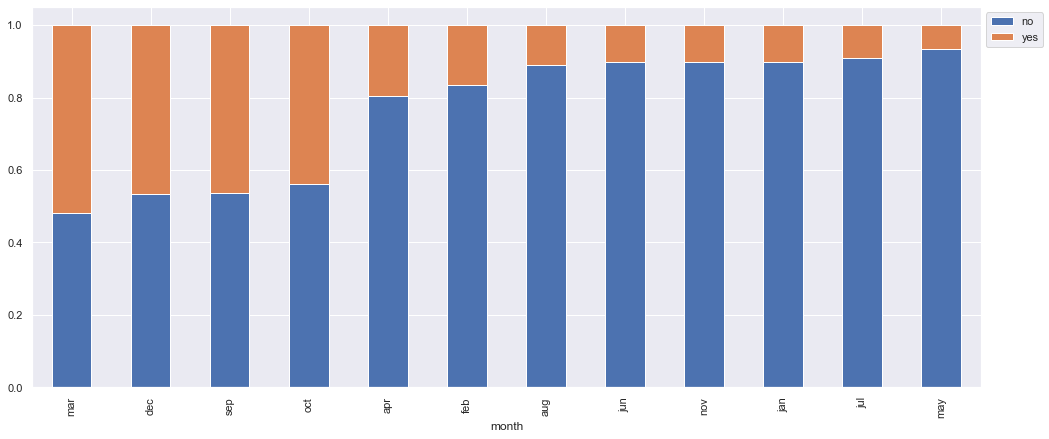

y                  no   yes    All
poutcome                          
All             39922  5289  45211
not applicable  33573  3386  36959
success           533   978   1511
failure          4283   618   4901
other            1533   307   1840
------------------------------------------------------------------------------------------------------------------------


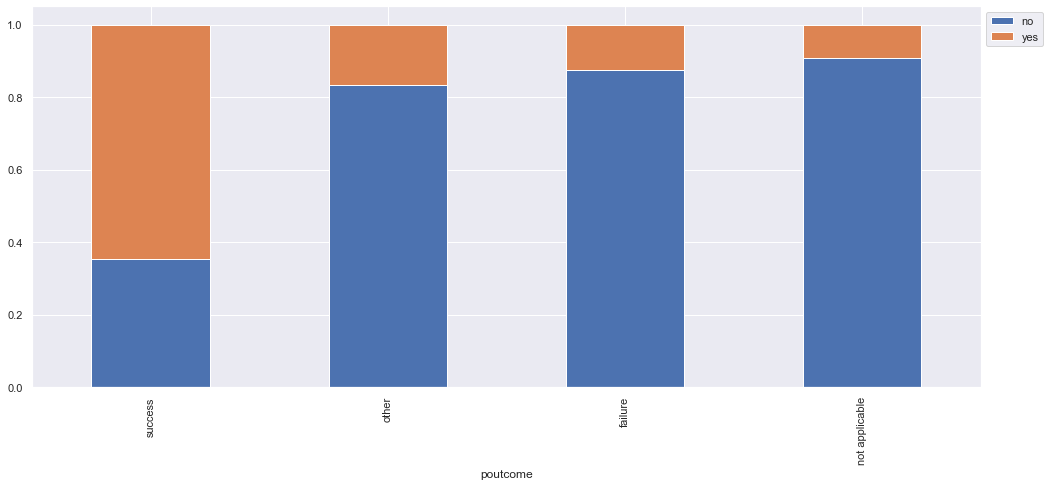

In [12]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome']

for col in cols:
    stacked_plot(df[col])

#### Observations
- Students are the most likely to buy the product, nearly 30% of student customers had bought the term deposit. They are followed by retired and unemployed customers.
- Single customers are slightly more likely to buy than divorced or married customers, but there is not much difference.
- Customers with tertiary education are more likely to buy the product.
- Customers with no credit default, or no personal loan or no housing loan are generally twice more likely to purchase the product.
- Method of communication doesn't seem to have much of an impact on whether the customer buys or not.
- The 'day' feature will not give much insight, because it is the last day of contact. The first day of contact may be a better indicator.
- The 'month' can be used for insights, because we would not expect a period of more than one month for the customer to make a decision. The only caveat is if the first contact is at the end of a month and then continues to the next month. Regardless, March, December, September and October has the highest conversions of close to 50%. The reason for this is unclear.
- Customers who bought the product in the previous campaign, are far more likely to buy the term deposit. Around 50% of them made the purchase in the current campaign.

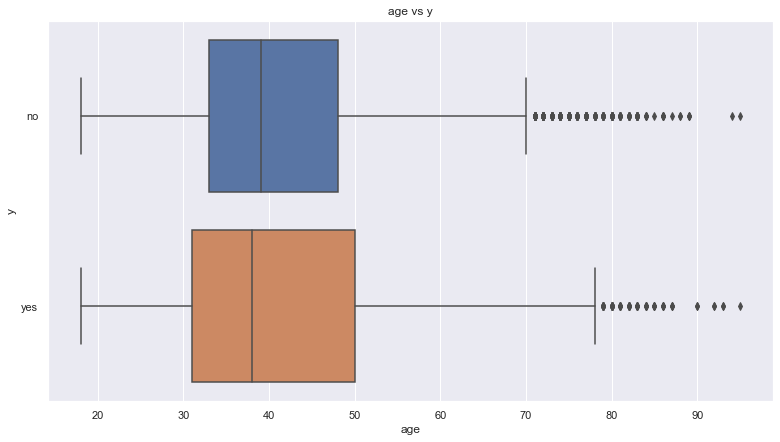

<Figure size 864x288 with 0 Axes>

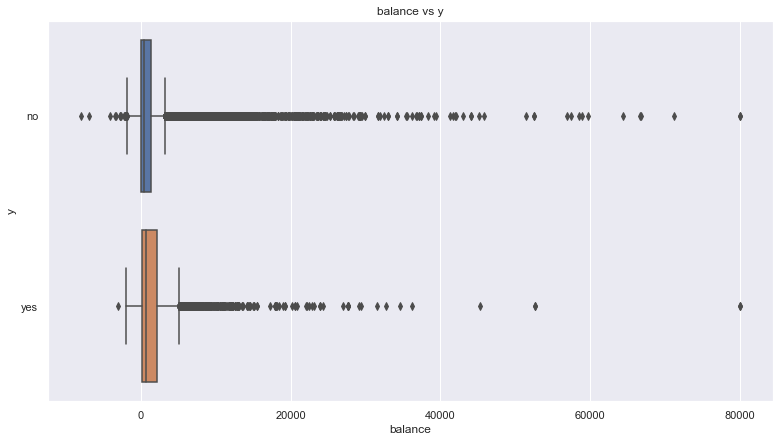

<Figure size 864x288 with 0 Axes>

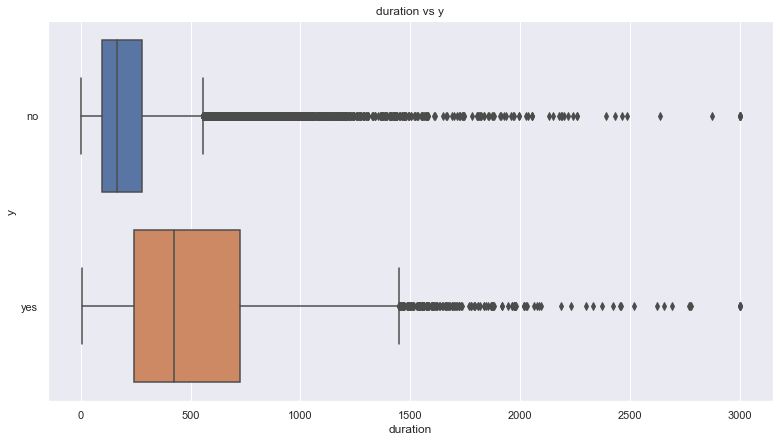

<Figure size 864x288 with 0 Axes>

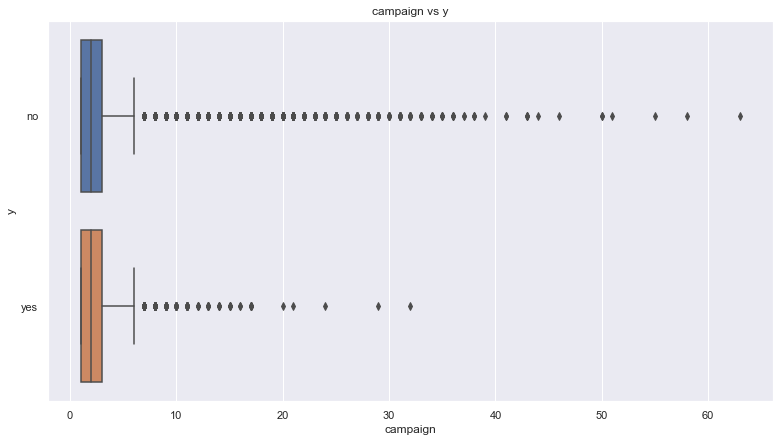

<Figure size 864x288 with 0 Axes>

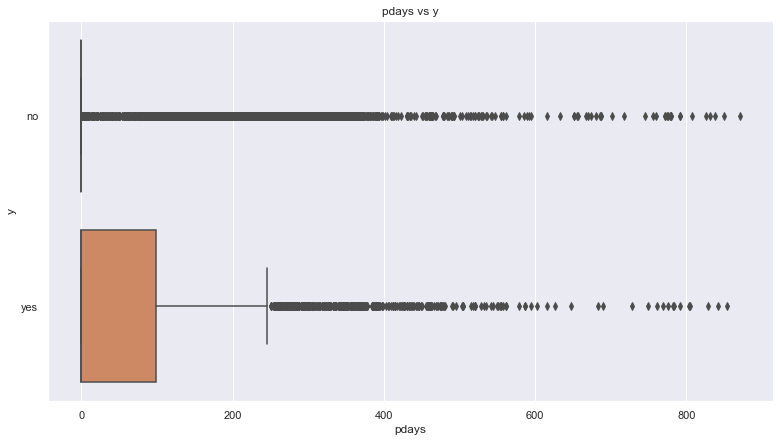

<Figure size 864x288 with 0 Axes>

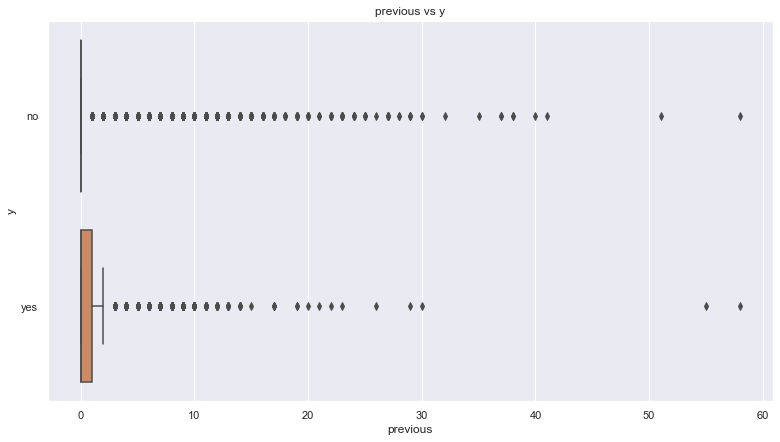

<Figure size 864x288 with 0 Axes>

In [13]:
# Plotting boxplots with y variable as hue

cols = ['age','balance','duration', 'campaign', 'pdays',
       'previous']

for col in cols:
    plt.title("{} vs y".format(col))
    sns.boxplot(df[col], df['y'])
    plt.figure(figsize=(12,4))
    plt.show()

#### Observations
- Customers who bought the product had their last call of a larger duration, but since it is their last call, we cannot get much insight into this. It may have been a longer call because of the purchase. 
- Customers who bought the product tend to have higher bank balances.
- The other graphs do not provide much meaningful insights.

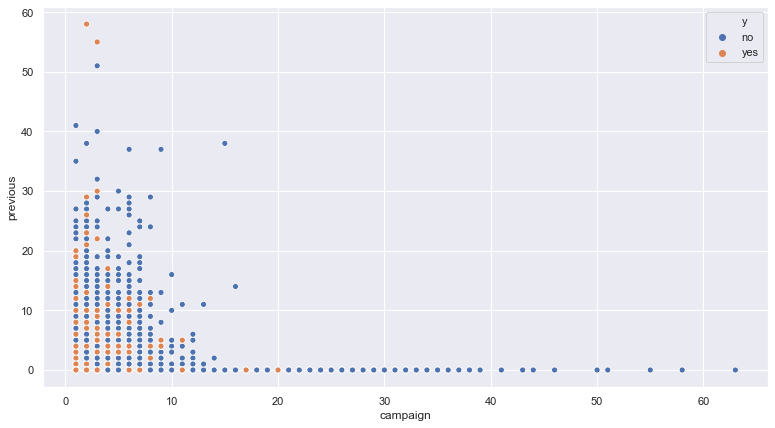

In [14]:
sns.scatterplot(df['campaign'], df['previous'], df['y'])

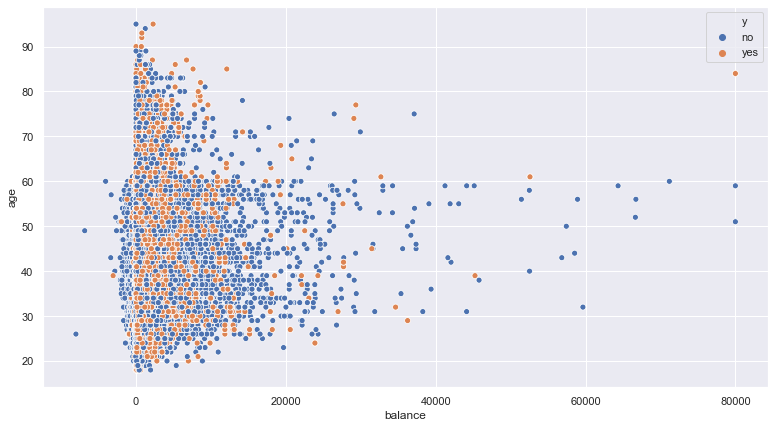

In [15]:
sns.scatterplot(df['balance'], df['age'], df['y'])

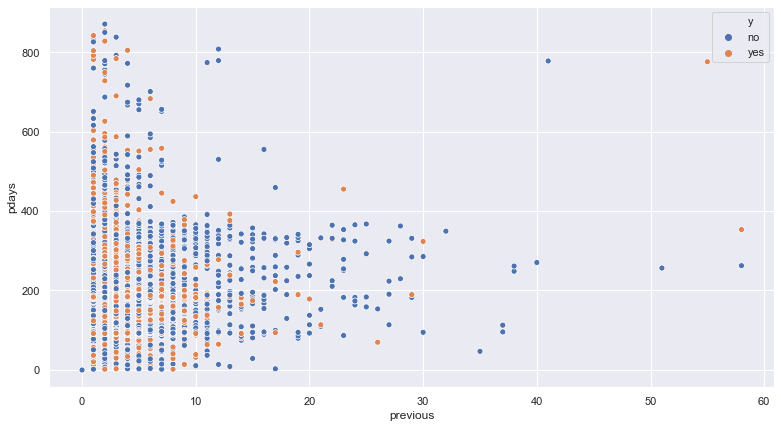

In [16]:
sns.scatterplot(df['previous'], df['pdays'], df['y'])

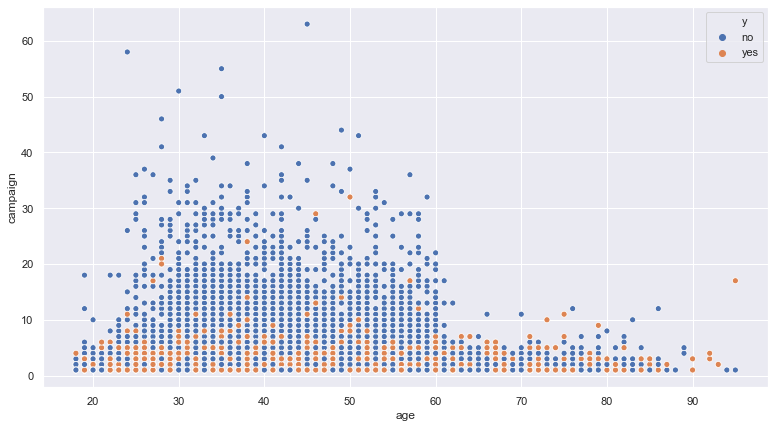

In [17]:
sns.scatterplot(df['age'], df['campaign'], df['y'])

#### There is not much that can be deducted from these graphs. One observation is that the successful contacts are those that generally had fewer number of contacts, between 1 to 10. One explanation could be that the customer generally would make a decision by the 10th contact, and after that it is more difficult for the bank to persuade the customer to purchase.

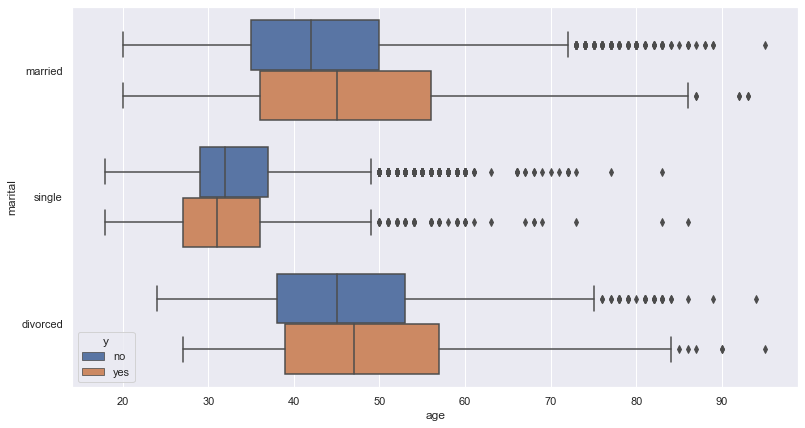

In [18]:
sns.boxplot(df['age'], df['marital'], df['y'])

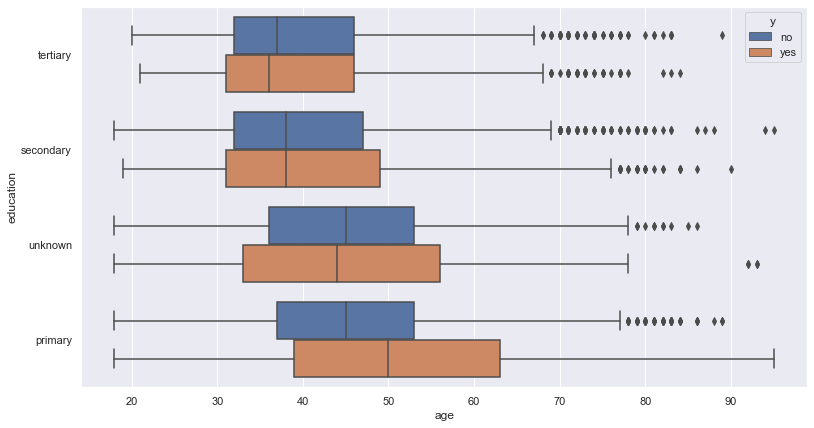

In [19]:
sns.boxplot(df['age'], df['education'], df['y'])

#### Among customers with primary education, older customers tended to convert more often than younger ones.

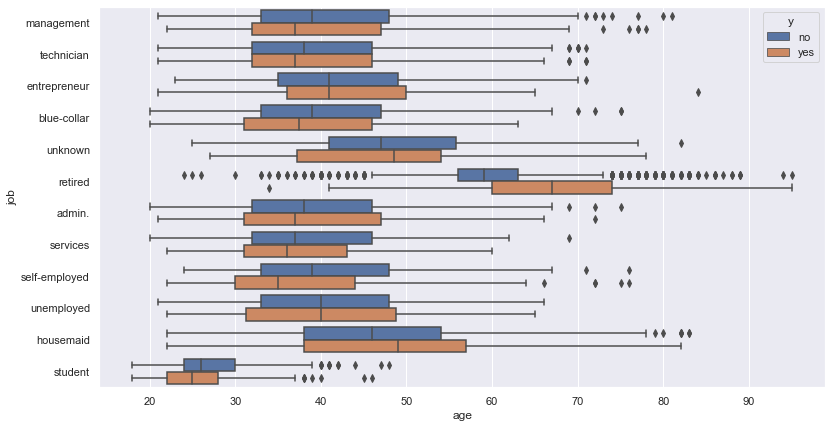

In [20]:
sns.boxplot(df['age'], df['job'], df['y'])

#### Among retirees, older customers ( ~ 65 years) tended to buy the product rather than younger (~55 to 60 years) customers.